In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import seaborn.objects as so

In [3]:
directory_path = r'D:\origin-source-code-bill\models\KMeans\cluster\3'
directory_path_box = 'D:\origin-source-code-bill\models\Box'
pkl_files = [f for f in os.listdir(directory_path) if f.endswith('.pkl')]
print(pkl_files)

# plt.figure(figsize=(12, 8))
cluster_list = []
quartile_list = []


for pkl_file in pkl_files:
    file_path = os.path.join(directory_path, pkl_file)
    # print("file :::" , file_path)
    variable_name = os.path.splitext(pkl_file)[0]
    # print("Var ::" , variable_name)
    df_col_combined = pd.read_pickle(file_path)
    print( df_col_combined.columns)
    
    date = pd.to_timedelta(df_col_combined['total_time'])
    time_hours = date.dt.total_seconds() / 3600
    
    df_col_combined['hours'] = time_hours
    # print("DF ::" , df_col_combined.columns)
    
    df_last_col = df_col_combined.iloc[:,-4].unique()
    col_srt = df_col_combined.columns[-4]
    
    for cluster_value in df_last_col :
        print("I :::", cluster_value)
        cluster_data = df_col_combined[df_col_combined[col_srt] == cluster_value]
        print("================")
        # print(cluster_data)
        if cluster_value == 0 :
                cluter0_q1 = np.percentile(cluster_data['hours'], 25)
                cluter0_q3 = np.percentile(cluster_data['hours'], 75)
                cluter0_median = np.median(cluster_data['hours'])
        if cluster_value == 1 :
                cluter1_q1 = np.percentile(cluster_data['hours'], 25)
                cluter1_q3 = np.percentile(cluster_data['hours'], 75)
                cluter1_median = np.median(cluster_data['hours'])
        if cluster_value == 2 :
                cluter2_q1 = np.percentile(cluster_data['hours'], 25)
                cluter2_q3 = np.percentile(cluster_data['hours'], 75)
                cluter2_median = np.median(cluster_data['hours'])
    


    quartile_data = {
                      'col' : col_srt,
                      'cluter0_q1': [cluter0_q1],
                      'cluter0_median' : [cluter0_median],
                      'cluter0_q3': [cluter0_q3],
                      'cluter1_q1': [cluter1_q1],
                      'cluter1_median' : [cluter1_median],
                      'cluter1_q3': [cluter1_q3],
                      'cluter2_q1': [cluter2_q1],
                      'cluter2_median' : [cluter2_median],
                      'cluter2_q3': [cluter2_q3]
                      }
    cluster_list.append(quartile_data)
    results = pd.DataFrame(cluster_list)
    
    q0_75 = cluter0_q3 -cluter0_median
    print("Q0 75 :: " , q0_75)
    q0_25 = cluter0_median - cluter0_q1
    print("Q0 25 :: " , q0_25)
    q1_75 = cluter1_q3 -cluter1_median
    print("Q1 75 :: " , q1_75)
    q1_25 = cluter1_median - cluter1_q1
    print("Q1 25 :: " , q1_25)
    q2_75 = cluter2_q3 -cluter2_median
    print("Q2 75 :: " , q1_75)
    q2_25 = cluter2_median - cluter2_q1
    print("Q2 25 :: " , q2_25)
    
    
    quartile_data_2 = {
                        'col' : col_srt,
                        'cluter0_q1': [cluter0_q1],
                        'cluter0_median' : [cluter0_median],
                        'cluter0_q3': [cluter0_q3],
                        'Q0_25' : [q0_25],
                        'Q0_75' : [q0_75],
                        'cluter1_q1': [cluter1_q1],
                        'cluter1_median' : [cluter1_median],
                        'cluter1_q3': [cluter1_q3],
                        'Q1_25' : [q1_25],
                        'Q1_75' : [q1_75],
                        'cluter2_q1': [cluter2_q1],
                        'cluter2_median' : [cluter2_median],
                        'cluter2_q3': [cluter2_q3],
                        'Q2_25' : [q2_25],
                        'Q2_75' : [q2_75],
                      }
    quartile_list.append(quartile_data_2) 
    quartile_df = pd.DataFrame(quartile_list)

["['additions', 'begin_Bloaters', 'begin_Change Preventers', 'begin_Couplers', 'begin_Object-Orientation Abusers', 'end_Bloaters', 'end_Change Preventers', 'end_Couplers']_3.pkl", "['additions', 'begin_Bloaters', 'begin_Change Preventers', 'begin_Couplers', 'begin_Object-Orientation Abusers', 'end_Bloaters', 'end_Change Preventers', 'end_Object-Orientation Abusers']_3.pkl", "['additions', 'begin_Bloaters', 'begin_Change Preventers', 'begin_Couplers', 'begin_Object-Orientation Abusers', 'end_Bloaters', 'end_Change Preventers']_3.pkl", "['additions', 'begin_Bloaters', 'begin_Change Preventers', 'begin_Couplers', 'begin_Object-Orientation Abusers', 'end_Bloaters', 'end_Couplers', 'end_Object-Orientation Abusers']_3.pkl", "['additions', 'begin_Bloaters', 'begin_Change Preventers', 'begin_Couplers', 'begin_Object-Orientation Abusers', 'end_Bloaters', 'end_Couplers']_3.pkl", "['additions', 'begin_Bloaters', 'begin_Change Preventers', 'begin_Couplers', 'begin_Object-Orientation Abusers', 'end

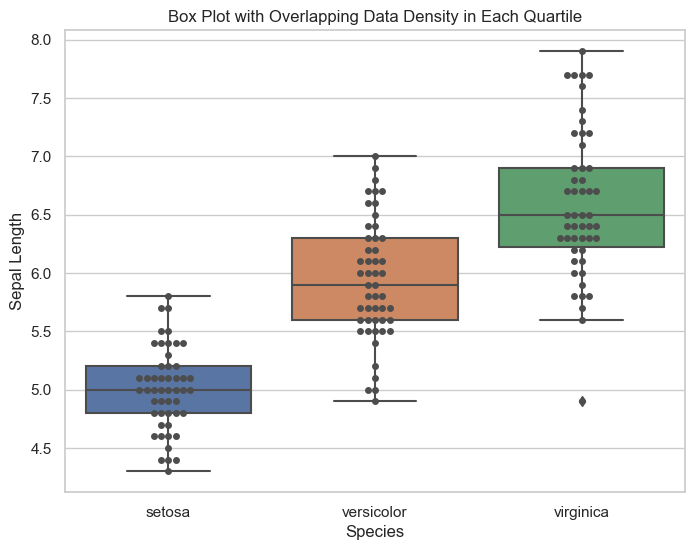

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = sns.load_dataset("iris")

# Create a box plot with quartiles
plt.figure(figsize=(8, 6))
sns.boxplot(x="species", y="sepal_length", data=data)

# Add overlaid swarm plot to show data density
sns.swarmplot(x="species", y="sepal_length", data=data, color="0.3")

# Set labels and title
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.title("Box Plot with Overlapping Data Density in Each Quartile")

# Show the plot
plt.show()
